# Cell 1 : Setup and Preprocessing

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Build the bridge
sys.path.append(os.path.abspath('..'))

# 2. Import the NEW functions from your professional models file
from src.data_loader import load_raw_data
from src.preprocessing import clean_and_feature_engineer
from src.models import get_kmeans  # This replaces get_clustering_pipeline

# 3. Load and clean
df = clean_and_feature_engineer(load_raw_data())

# 4. Prepare data for clustering
features_for_clustering = ['Income', 'TotalSpending', 'Age', 'Children', 'Recency']
data_to_cluster = df[features_for_clustering]

# 5. Scale the data (Mandatory for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)

print("Setup complete! New clustering functions loaded and data scaled.")

Setup complete! New clustering functions loaded and data scaled.


# Cell 2 : Find the Elbow

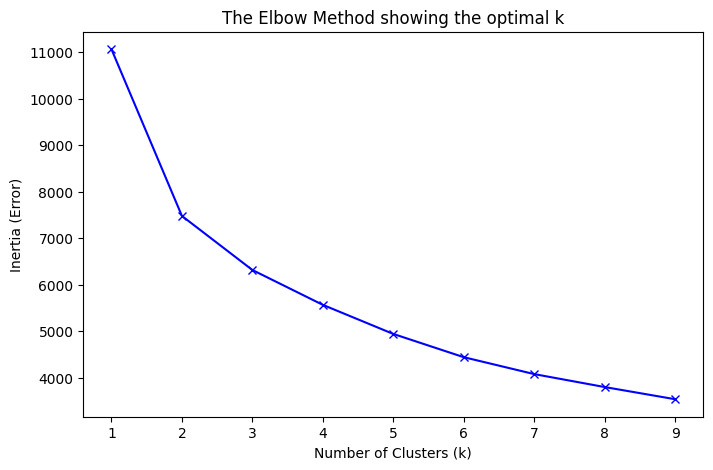

In [2]:
inertia = []
K = range(1, 10)
for k in K:
    # Using the new function from your models.py
    km = get_kmeans(n_clusters=k)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Error)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Cell 3 : Apply K-Mean and visualize for K=4

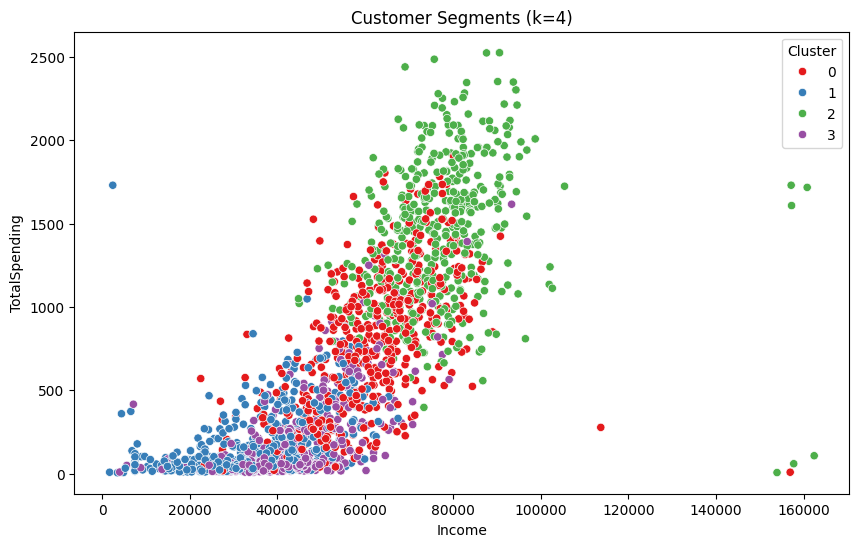

Average values per cluster:


,Income,TotalSpending,Age,Children,Recency
Cluster,,,,,
0,61176.850719,773.865108,57.607914,0.742806,46.305755
1,32687.245467,152.252441,38.013947,0.843794,48.740586
2,76962.221774,1433.945565,41.691532,0.290323,51.629032
3,43585.875847,209.042889,49.611738,2.108352,49.954853


In [3]:
# 1. Run final clustering with the optimal k (usually 4)
n_clusters = 4
kmeans = get_kmeans(n_clusters=n_clusters)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# 2. Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='TotalSpending', hue='Cluster', palette='Set1')
plt.title(f'Customer Segments (k={n_clusters})')
plt.show()

# 3. View the Profiles
cluster_summary = df.groupby('Cluster')[features_for_clustering].mean()
print("Average values per cluster:")
cluster_summary